# MMC Laboratorium 6

Autor: Jakub Ostrzołek

## Zadanie 1

### Funkcje ładujące wyniki działania programu `epidemia`

In [1]:
import numpy as np
from dataclasses import dataclass
from typing import TextIO

BINARY = "./out/ising"


@dataclass
class ExperimentResult:
    system_energy_mean: float
    ghost_energy_mean: float
    magnetization_mean: float
    temperature: float


def parse_experiment_result(output: TextIO) -> ExperimentResult:
    lines = [line for line in output.readlines() if "=" in line]
    values = [line.split("=")[1].strip() for line in lines]
    return ExperimentResult(*map(float, values))

### Funkcja uruchamiająca program `epidemia`

Zmodyfikowałem program `epidemia` tak, żeby przyjmował swoje parametry poprzez argumenty wywołania linii poleceń.

In [2]:
from subprocess import run
from io import StringIO


def run_experiment(
    side: int = 10,
    energy: int = -184,
    steps: int = 1000,
) -> ExperimentResult:
    command = [
        BINARY,
        "--bok-mapy", str(side),
        "--energia", str(energy),
        "--liczba-krokow", str(steps),
    ]

    process = run(command, capture_output=True, encoding="UTF-8")
    process.check_returncode()

    out_buffer = StringIO(process.stdout)
    return parse_experiment_result(out_buffer)

### Wywołanie programu z domyślnymi parametrami

In [3]:
result = run_experiment()
result

ExperimentResult(system_energy_mean=-184.28, ghost_energy_mean=0.28, magnetization_mean=0.95714, temperature=1.46686)

In [30]:
SIDE = 50

energies = np.linspace(-10_000, 2_000, 50, dtype=int)

results = [run_experiment(side=SIDE, energy=energy) for energy in energies]

### Funkcje wizualizacji wyników działania programu `epidemia`

Funkcja `show_map` wyświetla mapę końcowego rozkładu osób o odpowiednich statusach.

Funkcja `show_sequences` wyświetla jedną ze statystyk czasowych przebiegu eksperymentu, poprzez wykreślenie linii dla każdego eksperymentu w ramach serii. Oprócz tego zaznacza linią przerywaną 5-ty percentyl wartości statystyki z końca przebiegów eksperymentów w serii.

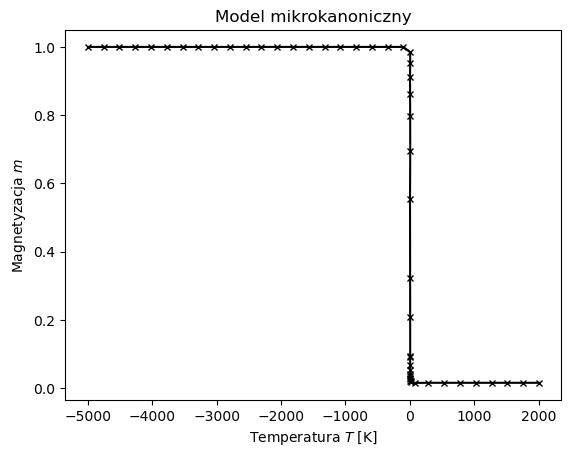

In [34]:
from matplotlib import pyplot as plt

xs = [result.temperature for result in results]
ys = [result.magnetization_mean for result in results]

plt.plot(xs, ys, "kx-", markersize=5)
plt.xlabel("Temperatura $T$ [K]")
plt.ylabel("Magnetyzacja $m$")
plt.title("Model mikrokanoniczny")
plt.show()
